# Día 6: Formato profesional + validación de datos

### Objetivo:
Automatizar la creación de un reporte de Excel que inclutya:

*   Formato de moneda
*   Negritas y colores de encabezado
*   Bordes
*   Validación de datos (lista deplegable)
*   Congelar la primera columna


In [1]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 4.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

#### Simular un dataset

In [3]:
productos = ['Laptop', 'Tablet', 'Smartphone', 'Monitor']
region  = ['Norte', 'Sur', 'Este', 'Oeste']
df = pd.DataFrame({
    'Producto': np.random.choice(productos, 100),
    'Region': np.random.choice(region, 100),
    'Ventas': np.random.randint(5000, 30000, size=(100,))
})

In [6]:
df.head()

,Producto,Region,Ventas
0,Laptop,Sur,6292
1,Smartphone,Sur,24762
2,Monitor,Sur,25487
3,Tablet,Oeste,12624
4,Tablet,Oeste,27328


#### Creamos el Excel con formato

Para la creación de excel haremos uso de la libreria xlsxwriter (es un módulo de Python para escribir archivos en el formato de archivo XLSX de Excel 2007+)


In [7]:
# Guardar como archivo Excel

with pd.ExcelWriter('reporte_excel.xlsx') as writer:
  df.to_excel(writer,sheet_name='Ventas', index=False)

  workbook = writer.book
  worksheet = writer.sheets['Ventas']

  # Formatos

  formato_encabezado = workbook.add_format({
      'bold': True,
      'text_wrap': True,
      'valign': 'top',
      'fg_color': '#4F81BD',
      'border': 1
  })

  formato_moneda = workbook.add_format({
      'num_format': '$#,##0',
      'border': 1
  })

  formato_celdas = workbook.add_format({
      'border': 1
  })

  # Aplicar formato a encabezados

  for col_num, value in enumerate(df.columns.values):
    worksheet.write(0, col_num, value, formato_encabezado)

  # Aplicar formato de celda y moneda

  for row in range(1, len(df) +1):
    for col in range(len(df.columns)):
      if df.columns[col] == 'Ventas':
        worksheet.write(row, col, df.iloc[row-1, col], formato_moneda)
      else:
        worksheet.write(row, col, df.iloc[row-1, col], formato_celdas)

  # Ajustar el ancho de columnas

  for i, col in enumerate(df.columns):
    worksheet.set_column(i, i, max(df[col].astype(str).map(len).max(), len(col)) + 5)

  # Congelar fila superior
  worksheet.freeze_panes(1, 0)


#### Analizando el dataset

In [9]:
# Top 5 productos por región

grupo = df.groupby(['Region', 'Producto']).sum().reset_index()

top_5 = grupo.groupby('Region').apply(lambda x: x.nlargest(5, 'Ventas')).reset_index(drop=True)
top_5

/tmp/ipython-input-9-378905247.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5 = grupo.groupby('Region').apply(lambda x: x.nlargest(5, 'Ventas')).reset_index(drop=True)


,Region,Producto,Ventas
0,Este,Smartphone,168821
1,Este,Monitor,116909
2,Este,Tablet,113695
3,Este,Laptop,64438
4,Norte,Monitor,164433
5,Norte,Laptop,100860
6,Norte,Smartphone,85017
7,Norte,Tablet,84058
8,Oeste,Laptop,175082
9,Oeste,Smartphone,110109


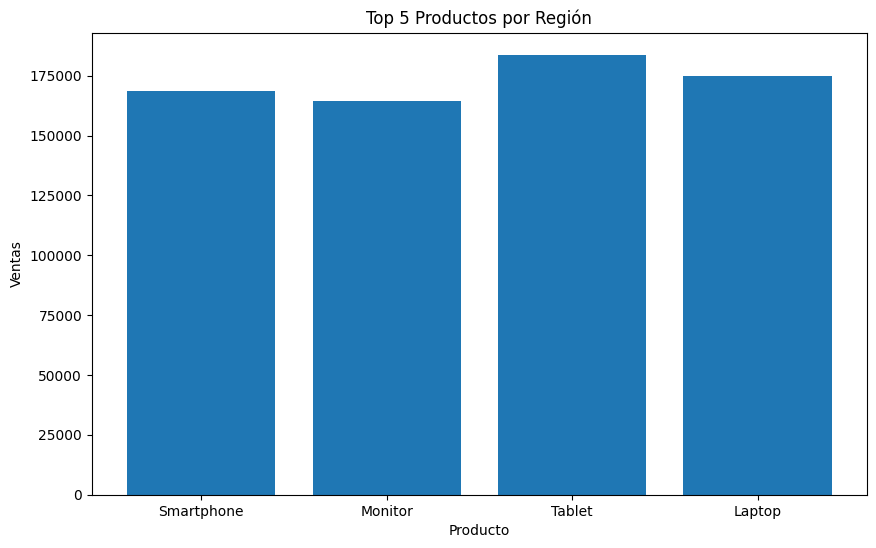

In [11]:
# Graficando los top 5

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_5['Producto'], top_5['Ventas'])
plt.title('Top 5 Productos por Región')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.show()


In [13]:
with pd.ExcelWriter('top_5_ventas_region.xlsx') as writer:
  top_5.to_excel(writer, sheet_name='Top 5', index=False)

  workbook = writer.book
  worksheet = writer.sheets['Top 5']

  # Fornmatos

  formato_encabezado = workbook.add_format({
      'bold': True,
      'text_wrap': True,
      'valign': 'top',
      'fg_color': '#4F81BD',
      'border': 1
  })

  # Escribir encabezados con formato

  for column, valor in enumerate(top_5.columns.values):
    worksheet.write(0, column, valor, formato_encabezado)

  # Aplicar formato a cada fila

  for row in range(1, len(top_5) +1):
    for col in range(len(top_5.columns)):
      valor = top_5.iloc[row-1, col]
      formato = formato_encabezado if top_5.columns[col] == 'Producto' else formato_celdas
      worksheet.write(row, col, valor, formato)

  # Ajustamos el ancho de columna

  for i, col in enumerate(top_5.columns):
    worksheet.set_column(i, i, max(top_5[col].astype(str).map(len).max(), len(col)) + 5)